# Анализ активности студентов онлайн курса Анализ данных в R

In [1]:
#Мы работаем аналитиком в Stepic
#Проблема: Большой разрыв между количеством начавших проходить курс, и закончивших этот курс( в среднем 5-10% по индустрии)
#Наши задачи ответить на два вопроса:
#Понять почему это происходит?
#Что нужно сделать, чтобы эту ситуацию улучшить, не меняя курс?

In [2]:
#Чтобы решить задачу, надо проанализировать действия студентов на всех этапах, найти причинно-следственные связи.

In [3]:
#Все студенты делятся на два класса: 
#1)Окончившие курс - 5-10%
#2)Неокончившие курс - 90-95%
#Если мы обучим модель предсказывать в самом начале обучения студента(например по активности в первые дни) -
#закончит он курс или нет, тогда эту информацию можно использовать, чтобы воздействовать на студента, и изменить его решение

# 1. Обработка, подготовка данных (Data Preprocessing, feature engineering)

In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')
events_data = pd.read_csv('event_data_train.csv')

In [7]:
#сначала мы получаем сырые данные
events_data.head(10) 
#timestamp - unixdate - это количество секунд, который прошли с 01.01.1970г
#Ссылки для работы с датой:
#https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
#https://python-scripts.com/datetime-time-python
#https://pythonworld.ru/obrabotka-dannyx/pandas-cookbook-7.html

step_id   timestamp           action  user_id
0    32815  1434340848           viewed    17632
1    32815  1434340848           passed    17632
2    32815  1434340848       discovered    17632
3    32811  1434340895       discovered    17632
4    32811  1434340895           viewed    17632
5    32811  1434340895           passed    17632
6    32929  1434340921       discovered    17632
7    32929  1434340921           viewed    17632
8    32929  1434340939  started_attempt    17632
9    32929  1434340944           passed    17632

In [8]:
events_data[events_data.user_id == 17632]

step_id   timestamp      action  user_id
0          32815  1434340848      viewed    17632
1          32815  1434340848      passed    17632
2          32815  1434340848  discovered    17632
3          32811  1434340895  discovered    17632
4          32811  1434340895      viewed    17632
...          ...         ...         ...      ...
2516082    31977  1505649526      viewed    17632
2516083    31976  1505649530      viewed    17632
2516084    31972  1505649532      viewed    17632
2516085    31971  1505649536      viewed    17632
2516086    31978  1505649546      viewed    17632

[909 rows x 4 columns]

In [9]:
#Самый начальный этап exploration data - мини исследование данных, проверка вообще те ли это данные

In [10]:
events_data.action.unique() #проверяем количество вариантов в action
#'viewed' - просмотрел
#'discovered' - впервые увидел
#'started_attempt' - начал решать
#'passed' - решил

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
#Переводим timestamp в стандартную дату

In [12]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [13]:
events_data.date.min() #смотрим минимальную дату
events_data.date.max() #смотрим максимальную дату

Timestamp('2018-05-19 23:33:31')

In [14]:
events_data.step_id.nunique() #количество степов 

198

In [15]:
events_data['day'] = events_data.date.dt.date #день

In [16]:
events_data.head()

step_id   timestamp      action  user_id                date         day
0    32815  1434340848      viewed    17632 2015-06-15 04:00:48  2015-06-15
1    32815  1434340848      passed    17632 2015-06-15 04:00:48  2015-06-15
2    32815  1434340848  discovered    17632 2015-06-15 04:00:48  2015-06-15
3    32811  1434340895  discovered    17632 2015-06-15 04:01:35  2015-06-15
4    32811  1434340895      viewed    17632 2015-06-15 04:01:35  2015-06-15

In [17]:
sns.set(rc={'figure.figsize':(9,6)}) #изменяем дефолтный размер графика, чтобы дата помещялась на оси х

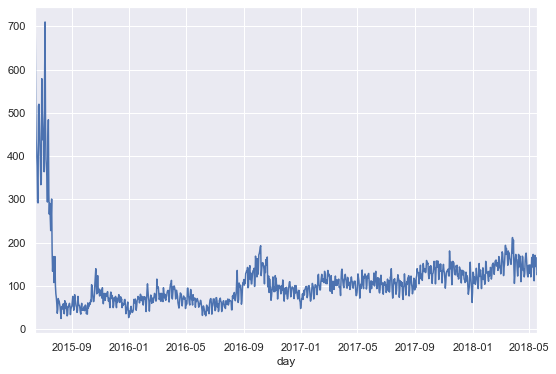

In [18]:
events_data.groupby('day').user_id.nunique().plot() #смотрим количество уникальных пользователей для каждого дня
#проверяем наши данные, базовая проверка

In [19]:
#Посмотрим, как распределены пользователи по количеству баллов, которые они получили за курс


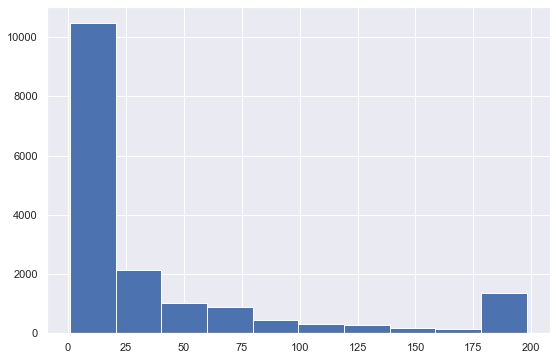

In [20]:
events_data[events_data.action == 'passed']\
    .groupby('user_id', as_index = False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_steps'})\
    .passed_steps.hist() 
#берем сданные степы
#группируем по пользователям
#считаем количество для каждого степа
#переименовываем колонки
#смотрим распределение
#Пользователи, у которых нет ни одного passed стэпа вообще не попадут в результат

In [21]:
#чтобы учесть пользователей, у которых 0 сданных степов воспользуемся методом pivot_table
users_events_data = events_data.pivot_table(index = 'user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

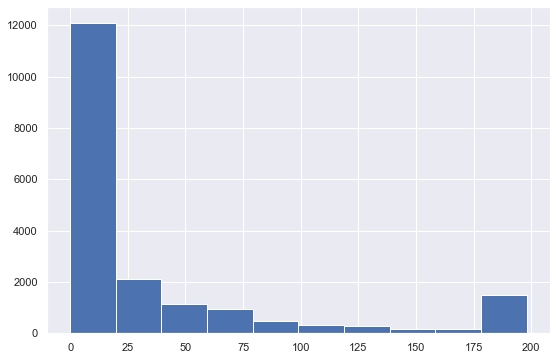

In [22]:
#чтобы учесть пользователей, у которых 0 сданных степов воспользуемся методом pivot_table
events_data.pivot_table(index = 'user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

In [23]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [24]:
submissions_data.head()

step_id   timestamp submission_status  user_id
0    31971  1434349275           correct    15853
1    31972  1434348300           correct    15853
2    31972  1478852149             wrong    15853
3    31972  1478852164           correct    15853
4    31976  1434348123             wrong    15853

In [25]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date #день

In [26]:
#чтобы учесть пользователей, у которых 0 сданных степов воспользуемся методом pivot_table
users_scores = submissions_data.pivot_table(index = 'user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [27]:
users_scores[users_scores.correct == users_scores.correct.max()]

submission_status  user_id  correct  wrong
439                   1046      421    513

In [28]:
users_scores.correct.max()

421

In [29]:
#Для каждого пользователя посчитаем:
#1)Сколько у него было уникальных степов
#2)Сколько он отправил правильных сабмитов
#3)Cколько он отправил неправильных сабмитов
#4)Сколько дней он учился на Степике
#5)Сравним, отличаются ли эти показатели у пользователей, которые успешно прошли курс и не прошли его
#6)Надо понять какой пользователь действительно бросил курс, а какой его еще продолжит
#1 категория: сдавшие курс, 2 категория: в процессе сдачи, 3 категория: не сдаст никогда
#для этого посчитаем отклонение по перерывам между сабмишнами, и решим какой перерыв статистически значим

In [30]:
#Рассчитаем промежутки между днями, когда пользователь проходил курс

In [31]:
events_data.tail()

step_id   timestamp      action  user_id                date  \
3480698    33375  1526772685      viewed    11677 2018-05-19 23:31:25   
3480699    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480700    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480701    32815  1526772750      passed     5198 2018-05-19 23:32:30   
3480702    33892  1526772811      viewed    18526 2018-05-19 23:33:31   

                day  
3480698  2018-05-19  
3480699  2018-05-19  
3480700  2018-05-19  
3480701  2018-05-19  
3480702  2018-05-19

In [32]:
#убюирает одинаковые user_id', 'day'
gap_data = events_data[['user_id', 'day', 'timestamp']]\
    .drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [33]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [34]:
gap_data = gap_data/(24*60*60)

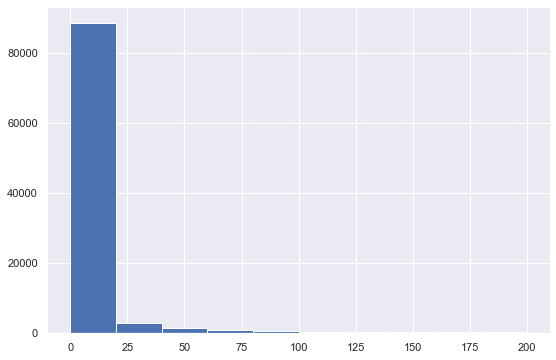

In [35]:
gap_data[gap_data<200].hist()

In [36]:
gap_data.quantile(0.95) # 95% пользователей не возвращаются на курс после 2 месяцев

59.760440972222156

In [37]:
gap_data.quantile(0.90) # 90% пользователей не возвращаются на курс после 18

18.325995370370403

In [38]:
#используем значение 30 дней отсутствия на курсе, чтобы отнести пользователя к категории дропнувшихся

In [358]:
users_data = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})    #последнее посещение курса

In [359]:
now = 1526772811          #дата на конец исследования
drop_out_threshold = 2592000 #один месяц в секундах

In [360]:
users_data.last_timestamp

0        1472827464
1        1519226966
2        1444581588
3        1499859939
4        1521634660
            ...    
19229    1517495987
19230    1510225034
19231    1512035039
19232    1509995096
19233    1520978742
Name: last_timestamp, Length: 19234, dtype: int64

In [361]:
users_data

user_id  last_timestamp
0            1      1472827464
1            2      1519226966
2            3      1444581588
3            5      1499859939
4            7      1521634660
...        ...             ...
19229    26790      1517495987
19230    26793      1510225034
19231    26794      1512035039
19232    26797      1509995096
19233    26798      1520978742

[19234 rows x 2 columns]

In [362]:
users_data['is_gone_user'] = (now - users_data.last_timestamp)>drop_out_threshold 
users_data       #определелили пользователей, которые больше не вернутся, но надо понять прошли они курс или нет

user_id  last_timestamp  is_gone_user
0            1      1472827464          True
1            2      1519226966          True
2            3      1444581588          True
3            5      1499859939          True
4            7      1521634660          True
...        ...             ...           ...
19229    26790      1517495987          True
19230    26793      1510225034          True
19231    26794      1512035039          True
19232    26797      1509995096          True
19233    26798      1520978742          True

[19234 rows x 3 columns]

In [363]:
users_scores

submission_status  user_id  correct  wrong
0                        2        2      0
1                        3       29     23
2                        5        2      2
3                        8        9     21
4                       14        0      1
...                    ...      ...    ...
9935                 26787        3      0
9936                 26790        1      0
9937                 26794       33      9
9938                 26797        2      0
9939                 26798        2      1

[9940 rows x 3 columns]

In [353]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer').head() 
#объединяем фреймы с корректно сданными степами и с паузой в занятиях
#по умолчанию merge запускается с параметром inner, чтобы не потерять данные надо указывать outer

In [354]:
users_data = users_data.fillna(0) #заполняем NA значения нулями

In [364]:
users_events_data

action  user_id  discovered  passed  started_attempt  viewed
0             1           1       0                0       1
1             2           9       9                2      10
2             3          91      87               30     192
3             5          11      11                4      12
4             7           1       1                0       1
...         ...         ...     ...              ...     ...
19229     26790           8       8                1       9
19230     26793           1       0                1       1
19231     26794          69      69               34     180
19232     26797          10      10                2      13
19233     26798          12      12                3      12

[19234 rows x 5 columns]

In [366]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [368]:
users_data

user_id  last_timestamp  is_gone_user  discovered  passed  \
0            1      1472827464          True           1       0   
1            2      1519226966          True           9       9   
2            3      1444581588          True          91      87   
3            5      1499859939          True          11      11   
4            7      1521634660          True           1       1   
...        ...             ...           ...         ...     ...   
19229    26790      1517495987          True           8       8   
19230    26793      1510225034          True           1       0   
19231    26794      1512035039          True          69      69   
19232    26797      1509995096          True          10      10   
19233    26798      1520978742          True          12      12   

       started_attempt  viewed  
0                    0       1  
1                    2      10  
2                   30     192  
3                    4      12  
4                    0       1  
...                ...     ...  
19229                1       9  
19230                1       1  
19231               34     180  
19232                2      13  
19233                3      12  

[19234 rows x 7 columns]

In [223]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days  #считаем количество уникальных дней для каждого пользователя, переводим серию во фрейм, убираем индексы

user_id  day
0            1    1
1            2    2
2            3    7
3            5    2
4            7    1
...        ...  ...
19229    26790    4
19230    26793    1
19231    26794    9
19232    26797    2
19233    26798    1

[19234 rows x 2 columns]

In [349]:
users_data = users_data.merge(users_days, how='outer') #объединяем фрейм

In [350]:
users_data.user_id.nunique() == events_data.user_id.nunique() #проверяем что никого не потеряли, сравниваем количество user_id
#в начальном датафрейме и конечном

True

In [371]:
users_data.passed

0         0
1         9
2        87
3        11
4         1
         ..
19229     8
19230     0
19231    69
19232    10
19233    12
Name: passed, Length: 19234, dtype: int64

In [373]:
users_data['passed_course'] = users_data.passed>170 #можно так user_data['passed_corse'].value_counts(normalize=True)

In [376]:
users_data#с учетом прошедших курс

user_id  last_timestamp  is_gone_user  discovered  passed  \
0            1      1472827464          True           1       0   
1            2      1519226966          True           9       9   
2            3      1444581588          True          91      87   
3            5      1499859939          True          11      11   
4            7      1521634660          True           1       1   
...        ...             ...           ...         ...     ...   
19229    26790      1517495987          True           8       8   
19230    26793      1510225034          True           1       0   
19231    26794      1512035039          True          69      69   
19232    26797      1509995096          True          10      10   
19233    26798      1520978742          True          12      12   

       started_attempt  viewed  passed_course  
0                    0       1          False  
1                    2      10          False  
2                   30     192          False  
3                    4      12          False  
4                    0       1          False  
...                ...     ...            ...  
19229                1       9          False  
19230                1       1          False  
19231               34     180          False  
19232                2      13          False  
19233                3      12          False  

[19234 rows x 8 columns]

In [433]:
users_data.to_csv('users_data.csv')

In [432]:
users_data.groupby('passed_course').count() # 17809/1425 -  около 8% прошли курс

user_id  last_timestamp  is_gone_user  discovered  passed  \
passed_course                                                              
False            17809           17809         17809       17809   17809   
True              1425            1425          1425        1425    1425   

               started_attempt  viewed  
passed_course                           
False                    17809   17809  
True                      1425    1425

In [229]:
#Статья по merge https://habr.com/ru/post/448072/

In [230]:
#Проблема: Наша модель должна научиться, как можно раньше(!) предсказывать дропнется человек с курса или нет
#возьмем первую неделю или несколько дней данных каждого пользователя и по ним попробуем предсказать пройдет он курс или нет
#этим мы займемся во втором модуле

# Предсказать: пройдет ли пользователь курс, по 5 дням активности

In [231]:
#Выбираем количество дней за которые мы хотим предсказать исход
users_data[users_data.passed_course].day.median() #медианная продолжительность прохождения курса - 20 дней

20.0

In [232]:
#Отбираем события, которые происходили в течение 3 дней для каждого пользователя, готовим данные для обучения
user_min_time = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp':'min'})\
    .rename({'timestamp':'min_timestamp'}, axis=1)
#начало действий юзера на курсе

In [233]:
user_min_time.head()

user_id  min_timestamp
0        1     1472827464
1        2     1514383364
2        3     1434358476
3        5     1466156809
4        7     1521634660

In [234]:
users_data = users_data.merge(user_min_time, how='outer')

In [235]:
events_data_train = events_data

In [236]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str) #сшили id и timestamp

In [237]:
events_data

step_id   timestamp      action  user_id                date  \
0          32815  1434340848      viewed    17632 2015-06-15 04:00:48   
1          32815  1434340848      passed    17632 2015-06-15 04:00:48   
2          32815  1434340848  discovered    17632 2015-06-15 04:00:48   
3          32811  1434340895  discovered    17632 2015-06-15 04:01:35   
4          32811  1434340895      viewed    17632 2015-06-15 04:01:35   
...          ...         ...         ...      ...                 ...   
3480698    32814  1526762783  discovered      943 2018-05-19 20:46:23   
3480699    32814  1526762783      passed      943 2018-05-19 20:46:23   
3480700    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480701    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480702    32815  1526772750      passed     5198 2018-05-19 23:32:30   

                day         user_time user_learning_time_threshold  
0        2015-06-15  17632_1434340848             17632_1434600048  
1        2015-06-15  17632_1434340848             17632_1434600048  
2        2015-06-15  17632_1434340848             17632_1434600048  
3        2015-06-15  17632_1434340895             17632_1434600048  
4        2015-06-15  17632_1434340895             17632_1434600048  
...             ...               ...                          ...  
3480698  2018-05-19    943_1526762783               943_1527021864  
3480699  2018-05-19    943_1526762783               943_1527021864  
3480700  2018-05-19   5198_1526772750              5198_1527031950  
3480701  2018-05-19   5198_1526772750              5198_1527031950  
3480702  2018-05-19   5198_1526772750              5198_1527031950  

[3480703 rows x 8 columns]

In [238]:
learning_time_threshold = 3 * 24 * 60 * 60

In [239]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [240]:
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [243]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold #объединяем минимальное и максимальное время

In [244]:
user_min_time.head()

user_id  min_timestamp user_learning_time_threshold
0        1     1472827464                 1_1473086664
1        2     1514383364                 2_1514642564
2        3     1434358476                 3_1434617676
3        5     1466156809                 5_1466416009
4        7     1521634660                 7_1521893860

In [245]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']],  how='outer')

In [246]:
events_data

step_id   timestamp      action  user_id                date  \
0          32815  1434340848      viewed    17632 2015-06-15 04:00:48   
1          32815  1434340848      passed    17632 2015-06-15 04:00:48   
2          32815  1434340848  discovered    17632 2015-06-15 04:00:48   
3          32811  1434340895  discovered    17632 2015-06-15 04:01:35   
4          32811  1434340895      viewed    17632 2015-06-15 04:01:35   
...          ...         ...         ...      ...                 ...   
3480698    32814  1526762783  discovered      943 2018-05-19 20:46:23   
3480699    32814  1526762783      passed      943 2018-05-19 20:46:23   
3480700    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480701    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480702    32815  1526772750      passed     5198 2018-05-19 23:32:30   

                day         user_time user_learning_time_threshold  
0        2015-06-15  17632_1434340848             17632_1434600048  
1        2015-06-15  17632_1434340848             17632_1434600048  
2        2015-06-15  17632_1434340848             17632_1434600048  
3        2015-06-15  17632_1434340895             17632_1434600048  
4        2015-06-15  17632_1434340895             17632_1434600048  
...             ...               ...                          ...  
3480698  2018-05-19    943_1526762783               943_1527021864  
3480699  2018-05-19    943_1526762783               943_1527021864  
3480700  2018-05-19   5198_1526772750              5198_1527031950  
3480701  2018-05-19   5198_1526772750              5198_1527031950  
3480702  2018-05-19   5198_1526772750              5198_1527031950  

[3480703 rows x 8 columns]

In [247]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold] #фильтруем

In [248]:
events_data_train

step_id   timestamp      action  user_id                date  \
0          32815  1434340848      viewed    17632 2015-06-15 04:00:48   
1          32815  1434340848      passed    17632 2015-06-15 04:00:48   
2          32815  1434340848  discovered    17632 2015-06-15 04:00:48   
3          32811  1434340895  discovered    17632 2015-06-15 04:01:35   
4          32811  1434340895      viewed    17632 2015-06-15 04:01:35   
...          ...         ...         ...      ...                 ...   
3480698    32814  1526762783  discovered      943 2018-05-19 20:46:23   
3480699    32814  1526762783      passed      943 2018-05-19 20:46:23   
3480700    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480701    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480702    32815  1526772750      passed     5198 2018-05-19 23:32:30   

                day         user_time user_learning_time_threshold  
0        2015-06-15  17632_1434340848             17632_1434600048  
1        2015-06-15  17632_1434340848             17632_1434600048  
2        2015-06-15  17632_1434340848             17632_1434600048  
3        2015-06-15  17632_1434340895             17632_1434600048  
4        2015-06-15  17632_1434340895             17632_1434600048  
...             ...               ...                          ...  
3480698  2018-05-19    943_1526762783               943_1527021864  
3480699  2018-05-19    943_1526762783               943_1527021864  
3480700  2018-05-19   5198_1526772750              5198_1527031950  
3480701  2018-05-19   5198_1526772750              5198_1527031950  
3480702  2018-05-19   5198_1526772750              5198_1527031950  

[1014985 rows x 8 columns]

In [249]:
submissions_data[submissions_data.submission_status == 'wrong']\
.groupby('step_id').agg({'submission_status':'count'})\
.sort_values(by='submission_status', ascending=False)

submission_status
step_id                   
31978.0              16084
32031.0              13373
32202.0              13002
33481.0              10300
32075.0              10003
...                    ...
33482.0                707
33681.0                703
33362.0                673
32175.0                342
32929.0                 85

[76 rows x 1 columns]

In [250]:
submissions_data[submissions_data.submission_status == 'wrong']\
.step_id.value_counts()

31978.0    16084
32031.0    13373
32202.0    13002
33481.0    10300
32075.0    10003
           ...  
33482.0      707
33681.0      703
33362.0      673
32175.0      342
32929.0       85
Name: step_id, Length: 76, dtype: int64

# Проверка обработки

In [251]:
events_data_train.groupby('user_id').day.nunique().max() #максимальное число дней в датафрейме после обработки

4

In [305]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

# Отбираем фичи

In [410]:
X = submissions_data_train.groupby('user_id')\
.day\
.nunique()\
.to_frame()\
.reset_index()\
.rename(columns={'day':'days'})
#добавляем количество дней на курсе

In [411]:
X #будем постепенно дополнять этот датафрейм

user_id  days
0           2     1
1           3     1
2           8     1
3          14     1
4          16     3
...       ...   ...
8908    26787     1
8909    26790     1
8910    26794     3
8911    26797     1
8912    26798     1

[8913 rows x 2 columns]

In [412]:
step_tried =  submissions_data_train.groupby('user_id')\
.step_id\
.nunique()\
.to_frame()\
.reset_index()\
.rename(columns={'step_id':'steps_tried'})
#добавляем количество попыток решения

In [413]:
X = X.merge(step_tried, on='user_id', how='outer')

In [414]:
X

user_id  days  steps_tried
0           2     1            2
1           3     1            4
2           8     1           11
3          14     1            1
4          16     3           23
...       ...   ...          ...
8908    26787     1            3
8909    26790     1            1
8910    26794     3           27
8911    26797     1            2
8912    26798     1            2

[8913 rows x 3 columns]

In [415]:
X.shape

(8913, 3)

In [416]:
X= X.merge(submissions_data_train.pivot_table(index = 'user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index())

In [417]:
X['correct_ration'] = X.correct / (X.correct + X.wrong)

In [418]:
X

user_id  days  steps_tried  correct  wrong  correct_ration
0           2     1            2        2      0        1.000000
1           3     1            4        4      4        0.500000
2           8     1           11        9     21        0.300000
3          14     1            1        0      1        0.000000
4          16     3           23       23     27        0.460000
...       ...   ...          ...      ...    ...             ...
8908    26787     1            3        3      0        1.000000
8909    26790     1            1        1      0        1.000000
8910    26794     3           27       31      9        0.775000
8911    26797     1            2        2      0        1.000000
8912    26798     1            2        2      1        0.666667

[8913 rows x 6 columns]

In [419]:
X = X.merge(events_data_train.pivot_table(index = 'user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [420]:
X.head()

user_id  days  steps_tried  correct  wrong  correct_ration  viewed
0        2   1.0          2.0      2.0    0.0            1.00       9
1        3   1.0          4.0      4.0    4.0            0.50      20
2        8   1.0         11.0      9.0   21.0            0.30     154
3       14   1.0          1.0      0.0    1.0            0.00       9
4       16   3.0         23.0     23.0   27.0            0.46     132

In [421]:
X = X.fillna(0)

In [422]:
X.shape

(19234, 7)

In [423]:
X

user_id  days  steps_tried  correct  wrong  correct_ration  viewed
0            2   1.0          2.0      2.0    0.0            1.00       9
1            3   1.0          4.0      4.0    4.0            0.50      20
2            8   1.0         11.0      9.0   21.0            0.30     154
3           14   1.0          1.0      0.0    1.0            0.00       9
4           16   3.0         23.0     23.0   27.0            0.46     132
...        ...   ...          ...      ...    ...             ...     ...
19229    26774   0.0          0.0      0.0    0.0            0.00       1
19230    26781   0.0          0.0      0.0    0.0            0.00       6
19231    26788   0.0          0.0      0.0    0.0            0.00       1
19232    26789   0.0          0.0      0.0    0.0            0.00       2
19233    26793   0.0          0.0      0.0    0.0            0.00       1

[19234 rows x 7 columns]

In [424]:
X['passed_course'] = users_data.passed_course
X['is_gone_user'] = users_data.is_gone_user

In [425]:
users_data.passed_course

0        False
1        False
2        False
3        False
4        False
         ...  
19229    False
19230    False
19231    False
19232    False
19233    False
Name: passed_course, Length: 19234, dtype: bool

In [426]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [427]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [428]:
y = X.passed_course.map(int)

In [429]:
X = X.drop(['passed_course', 'is_gone_user'], axis = 1)

In [430]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [441]:
X #days	steps_tried	correct	wrong	correct_ration	viewed итоговые фичи

days  steps_tried  correct  wrong  correct_ration  viewed
user_id                                                           
2         1.0          2.0      2.0    0.0            1.00       9
3         1.0          4.0      4.0    4.0            0.50      20
8         1.0         11.0      9.0   21.0            0.30     154
14        1.0          1.0      0.0    1.0            0.00       9
16        3.0         23.0     23.0   27.0            0.46     132
...       ...          ...      ...    ...             ...     ...
26774     0.0          0.0      0.0    0.0            0.00       1
26781     0.0          0.0      0.0    0.0            0.00       6
26788     0.0          0.0      0.0    0.0            0.00       1
26789     0.0          0.0      0.0    0.0            0.00       2
26793     0.0          0.0      0.0    0.0            0.00       1

[17985 rows x 6 columns]

In [435]:
users_data = pd.read_csv('users_data.csv')

In [440]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

clf = LogisticRegressionCV(cv=5)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.coef_)
print(clf.intercept_)
print(cross_val_score(clf,X_train,y_train,cv=4).mean())

0.926605504587156
[[ 0.00289958  0.00198318  0.00179256 -0.0001747   0.00200273  0.0003155 ]]
[-2.45577876]
0.9193077726650273


In [438]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dt = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(3,6), 'max_leaf_nodes':range(6,15), 'min_samples_leaf': range(1,4),'min_samples_split':range(2,5)}
grid_search_cv_clf = GridSearchCV(dt,parameters,cv=4)
grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean())

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 2} 0.920419810517287


In [439]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier()
parameters = {'n_neighbors': range(15,25), 'leaf_size':range(1,7)}
grid_search_cv_clf = GridSearchCV(knn,parameters,cv=4,n_jobs=-1)
grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean())

{'leaf_size': 1, 'n_neighbors': 15} 0.920419810517287
